In [114]:
import re
import numpy as np
import pandas as pd
import os 

# Plotting 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#NLTK
from nltk.stem import WordNetLemmatizer

#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
# Importing the dataset.
file = r'C:\Users\every\OneDrive\바탕 화면\Github\NLP\sentiment_analysis\active_learning_tweets.csv'
dataset_columns = ['number','date','tweet','label']
dataframe = pd.read_csv(file, names = dataset_columns, encoding ='cp1252')
dataframe = dataframe[1:] # Remove the first row.
print(dataframe.shape)
print(dataframe.head())
print(dataframe.tail())

(52, 4)
   number                       date  \
1     0.0  2023-04-20 18:55:49+00:00   
2     1.0  2023-04-20 18:53:01+00:00   
3     2.0  2023-04-20 18:46:38+00:00   
4     3.0  2023-04-20 18:06:12+00:00   
5     4.0  2023-04-20 18:01:28+00:00   

                                               tweet label  
1  Brown - radioactive waste is a major driver of...     0  
2  Nuclear waste powered battery lasts for thousa...     1  
3  Brown - BL 11-2 had a 100 element Ge detector....     0  
4  EnergySolutions?ï¿½? Hittman Transportation Se...     1  
5  @stillgray @UnbiasedCrime They hate on nuclear...     0  
    number                       date  \
48    47.0  2023-04-19 22:14:56+00:00   
49    48.0  2023-04-19 21:25:50+00:00   
50    49.0  2023-04-19 21:20:29+00:00   
51    50.0  2023-04-19 21:18:18+00:00   
52    51.0  2023-04-19 20:58:03+00:00   

                                                tweet label  
48  @RAF_Luton Semi Nuclear Bombs save half the li...     1  
49  In NY, Hol

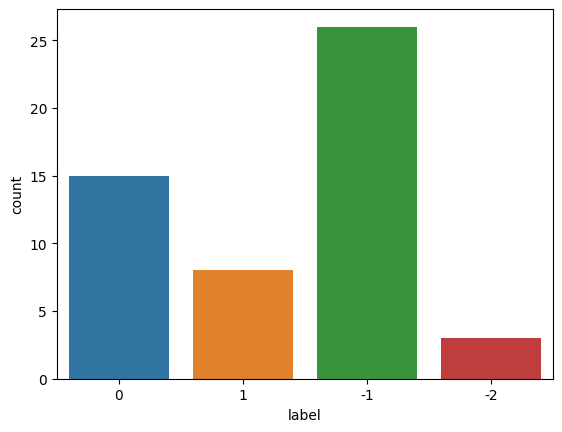

In [116]:
# Plotting the distribution for the data
# print(dataframe['tweet'].head(),dataframe['label'].head())
# ax = dataframe.groupby('label').count().plot(kind = 'bar',title ='Distribution of the data',legend = True)
# ax.set_xticklabels(['Negative','Neutral','Positive'], rotation = 0)
tweet,sentiment = list(dataframe['tweet']), list(dataframe['label'])
sns.countplot(x = 'label',data = dataframe)
plt.show()

In [117]:
# Then, we can start the pre processing of the dataset. 
data = dataframe[['tweet','label']]
#print(data)

data_pos = data[data['label'] == '1']
data_neg = data[data['label'] == '-1']
data_neutral = data[data['label'] == '0']
data_none = data[data['label'] == '-2']

print(data_pos.shape)
print(data_neg.head())
print(data_neutral.head())

(8, 2)
                                                tweet label
6   @SyntheticAway *detona un reactor nuclear*\r\n...    -1
8   @phil_hamm @dorfman_p If radioactive waste fro...    -1
10  The Tritium being used in current Fusion exper...    -1
11  @mlperk1 @surfurgurl01 @GeneticsSociety @Genet...    -1
12  @H0NEYRIVER using the nuclear heat to vaporize...    -1
                                                tweet label
1   Brown - radioactive waste is a major driver of...     0
3   Brown - BL 11-2 had a 100 element Ge detector....     0
5   @stillgray @UnbiasedCrime They hate on nuclear...     0
13  @DecoupleMedia If only there was a place that ...     0
14  Seismic Analyses Needed for LANL?ï¿½?s Two New...     0


In [118]:
# convert the uppercase into the lowercase
data['tweet'] = data['tweet'].str.lower()

C:\Users\every\AppData\Local\Temp\ipykernel_36464\1898214918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].str.lower()


In [119]:
# Next, we define the stopwords list in english
import spacy
import nltk
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS) # This is the list of redundant words.

def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in stopwords])
    # This function will return the survived words from the tweet

data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_stopwords(tweet))
# All the elements in the tweet column will be cleaned.
print(data['tweet'][20])

@dorfman_p yes, long overdue retire fossil fuels. concern nuclear cheaper solution radioactive waste remains toxic tens thousands years. managing radioactive waste big reason nuclear expensive.


C:\Users\every\AppData\Local\Temp\ipykernel_36464\1592308831.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_stopwords(tweet))


In [120]:
# Cleaning the punctuations
import string 
english_punctuations = string.punctuation
punctuation_list = english_punctuations

def cleaning_punctuations(tweet):
    translator = str.maketrans('','',punctuation_list)
    # str is a converting function, like 'int' function.
    # Syntax of maketrans function is str.maketrans(x,y,z)
    # Where x is the original string. 
    # y is a string with same length of x. 
    # x[i] will be replaced to y[i].
    # z is an optional input, this is a string describing which characters to remove from the original string.
    # therefore, this function makes sense. x and y parameter have the same length and z is something that we should remove.
    return tweet.translate(translator)
data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_punctuations(tweet))
print(data['tweet'][20])

dorfmanp yes long overdue retire fossil fuels concern nuclear cheaper solution radioactive waste remains toxic tens thousands years managing radioactive waste big reason nuclear expensive


C:\Users\every\AppData\Local\Temp\ipykernel_36464\3074164108.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_punctuations(tweet))


In [121]:
# Cleaning and removing repeating characters. 
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)1+',r'1',tweet) # re.sub() function replaces certain string with another string.
# I think the second parameter should be '', not '1'?
    # Syntax : re.sub(x,y,z)
    # x is the string that should be replaced. 
    # y is the string that will substitute x. 
    # z is a set of strings. In this case it will be a sentence or a paragraph.
data['tweet'] = data['tweet'].apply(lambda tweet: cleaning_repeating_char(tweet))
print(data['tweet'].tail()) 

48    rafluton semi nuclear bombs save half lives tr...
49    ny holtec international paused plans dump1 mil...
50    plongsticking kimiversenshow want release radi...
51    rachelquilty defenceaust deal albomp richardma...
52    january19 2023 putins poseidon radioactive tid...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\3154061502.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet: cleaning_repeating_char(tweet))


In [122]:
# Cleaning and removing URLs.
def cleaning_URLs(tweet):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',tweet)
# This function will remove the letters whenever it encounters 'www'.
data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_URLs(tweet))
print(data['tweet'].head())

1    brown  radioactive waste major driver environm...
2    nuclear waste powered battery lasts thousands ...
3    brown  bl12100 element ge detector ssrl50 jt g...
4    energysolutionsï¿½ hittman transportation serv...
5    stillgray unbiasedcrime hate nuclear energy it...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\3313314291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_URLs(tweet))


In [123]:
# Cleaning and removing numeric numbers
def cleaning_numbers(tweet):
    return re.sub('[0-9]+',' ',tweet)
data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_numbers(tweet))
print(data['tweet'].head())

1    brown  radioactive waste major driver environm...
2    nuclear waste powered battery lasts thousands ...
3    brown  bl  element ge detector ssrl  jt grad s...
4    energysolutionsï¿½ hittman transportation serv...
5    stillgray unbiasedcrime hate nuclear energy it...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\973204820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet : cleaning_numbers(tweet))


In [124]:
# We cleaned all the redundant texts from the data. 
# Let us tokenize the tweets.
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') # 'w' represent word.
# I think we need to put '\' here. 
# In the tutorial, there was no '\'. 
data['tweet'] = data['tweet'].apply(tokenizer.tokenize)
print(data['tweet'].head())

1    [brown, radioactive, waste, major, driver, env...
2    [nuclear, waste, powered, battery, lasts, thou...
3    [brown, bl, element, ge, detector, ssrl, jt, g...
4    [energysolutionsï, ½, hittman, transportation,...
5    [stillgray, unbiasedcrime, hate, nuclear, ener...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\1397124072.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(tokenizer.tokenize)


In [125]:
# Next, we start stemming from those tokens.
stemmizer = nltk.PorterStemmer()
def stemming_on_text(tweet) :
    tweet = [stemmizer.stem(word) for word in tweet]
    return tweet
data['tweet'] = data['tweet'].apply(stemming_on_text)
print(data['tweet'].head())

1    [brown, radioact, wast, major, driver, environ...
2    [nuclear, wast, power, batteri, last, thousand...
3    [brown, bl, element, ge, detector, ssrl, jt, g...
4    [energysolutionsï, ½, hittman, transport, serv...
5    [stillgray, unbiasedcrim, hate, nuclear, energ...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\4087556600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(stemming_on_text)


In [126]:
# Lemmatizer 
lemmatizer = nltk.WordNetLemmatizer()
def lemmatizer_on_text(tweet):
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    return tweet 
data['tweet'] = data['tweet'].apply(lambda tweet : lemmatizer_on_text(tweet))
print(data['tweet'].head())

1    [brown, radioact, wast, major, driver, environ...
2    [nuclear, wast, power, batteri, last, thousand...
3    [brown, bl, element, ge, detector, ssrl, jt, g...
4    [energysolutionsï, ½, hittman, transport, serv...
5    [stillgray, unbiasedcrim, hate, nuclear, energ...
Name: tweet, dtype: object


C:\Users\every\AppData\Local\Temp\ipykernel_36464\2743453014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(lambda tweet : lemmatizer_on_text(tweet))


6     @SyntheticAway *detona un reactor nuclear*\r\n...
8     @phil_hamm @dorfman_p If radioactive waste fro...
10    The Tritium being used in current Fusion exper...
11    @mlperk1 @surfurgurl01 @GeneticsSociety @Genet...
12    @H0NEYRIVER using the nuclear heat to vaporize...
15    ?ï¿½???????????????????????ï¿½??ï¿½?ALPS??????...
16    Fukushima is still leaking.  Any chance radioa...
17    "Nuclear woes." Why would anybody want very ex...
20    @dorfman_p Yes, it is long overdue to retire f...
23    @dorfman_p @InfraBrutalism There was never any...
25    @SaniaAhmad1111 Aunty nuclear bomb does not me...
26    ????#AbsoluteFact \r\nWarfare, radioactive????...
31    @ultrabrilliant Shadar Logoth in the Wheel of ...
32    Decommissioned nuclear power plant plans on du...
33    @C_pikapika But, nuclear energy is not at all ...
34    @JHC_53 @EngrStudent @goddeketal Okay, but you...
40    @BayouFilmProf I grew up with nuclear fallout ...
42    @WarClandestine There was a full-page head

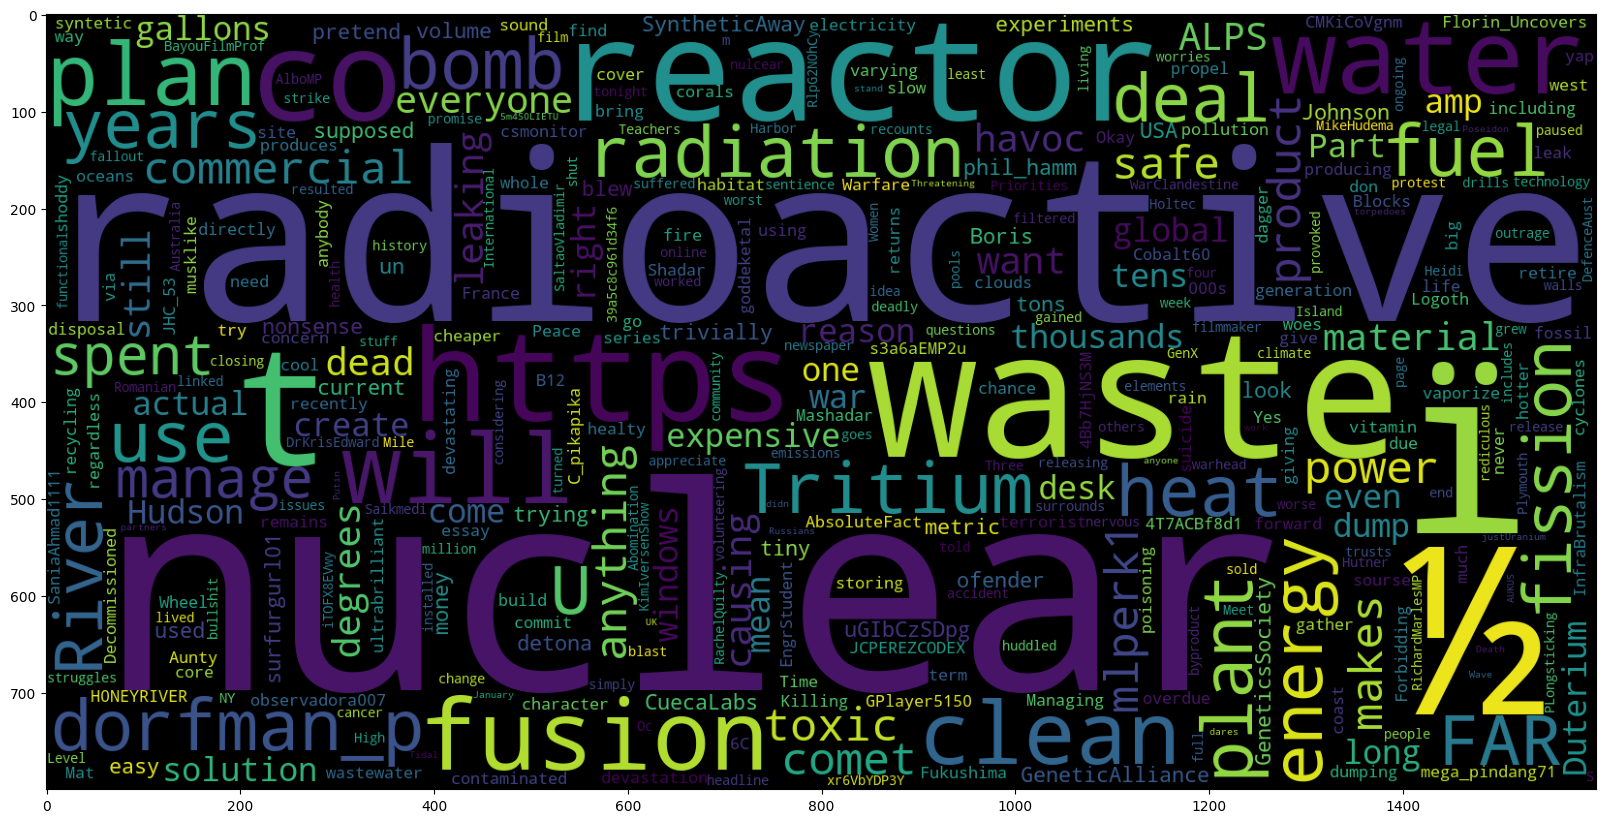

In [127]:
# Generate wordcloud with negative data points
data_neg = data_neg['tweet']
#print(data['tweet'].head())
print(data_neg)

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

2     Nuclear waste powered battery lasts for thousa...
4     EnergySolutions?ï¿½? Hittman Transportation Se...
7     @AnaKasparian liquid thorium salt is a nuclear...
18    @ElbridgeColby In case of a nuclear WW3, shoul...
19    INCOLOY #alloy825 has been carefully produced ...
Name: tweet, dtype: object


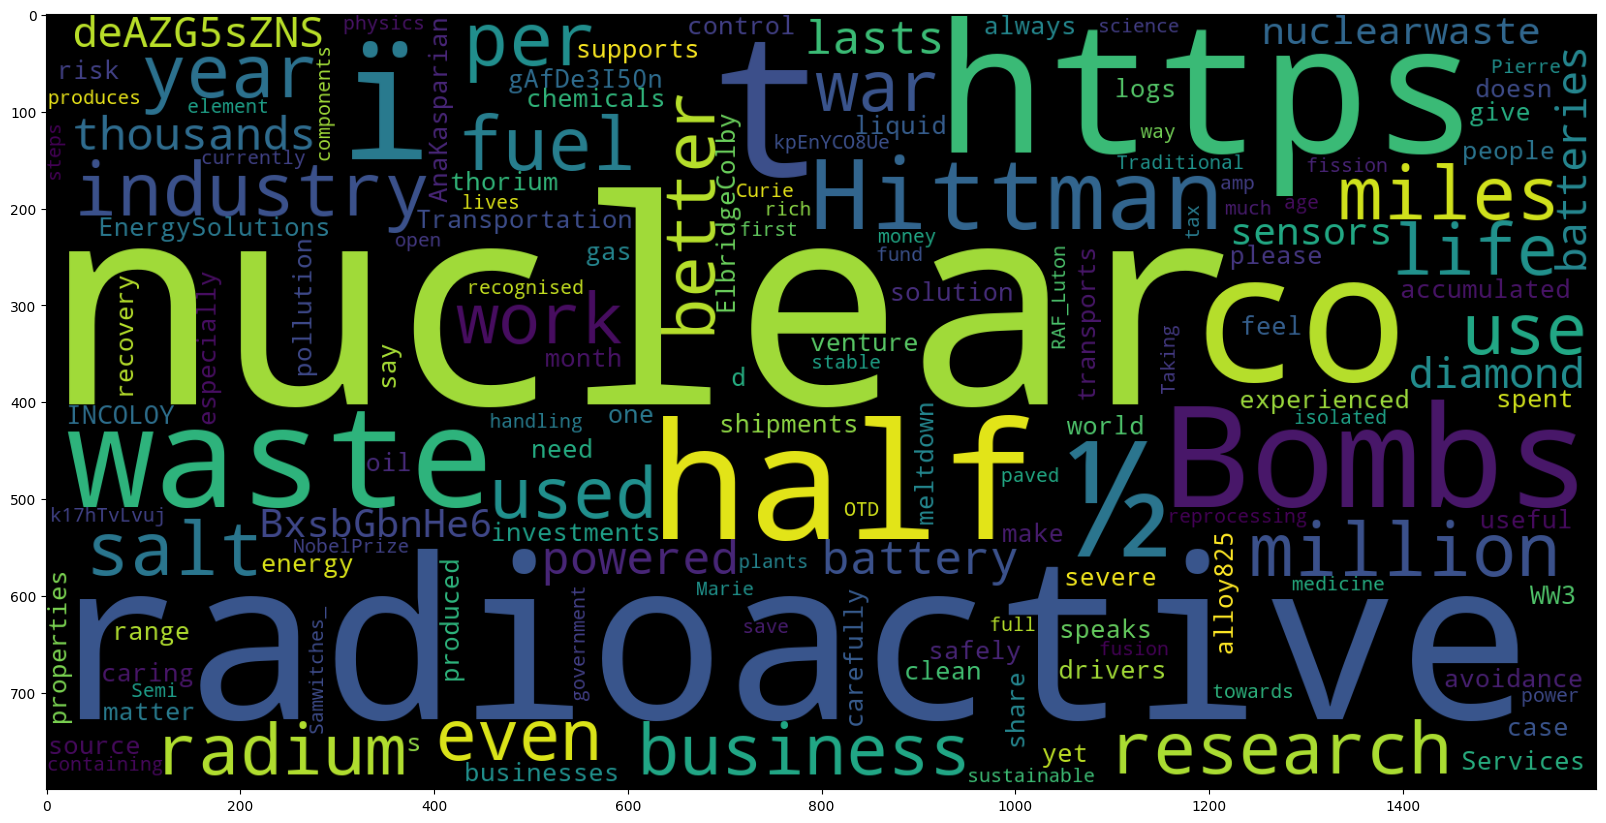

In [128]:
# Generate wordcloud with positive data points
data_pos = data_pos['tweet']
print(data_pos.head())

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()

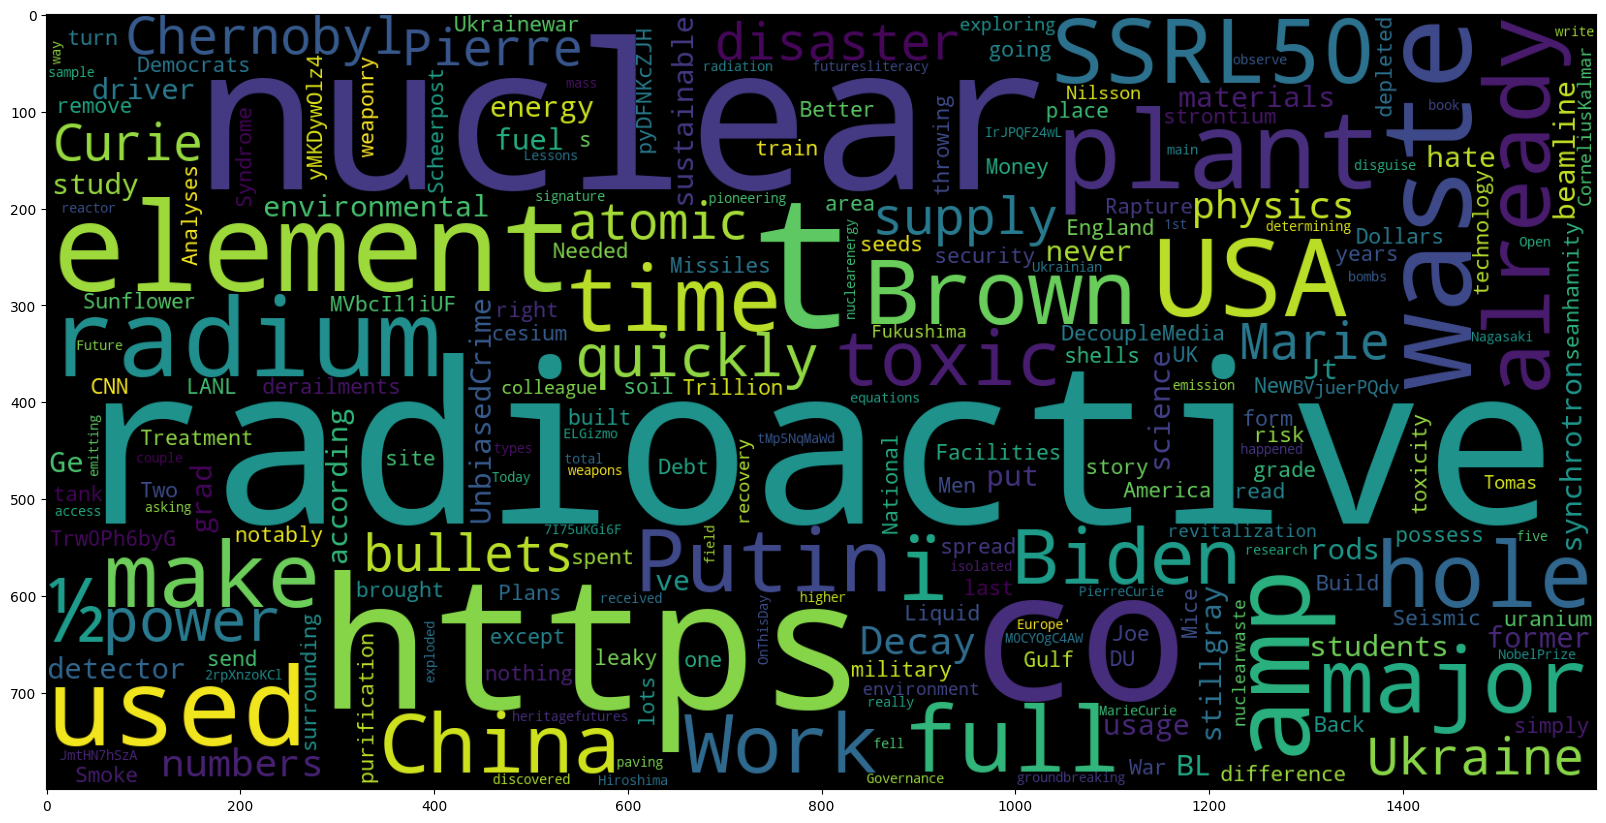

In [129]:
# Generate wordcloud with neutral data points
data_neutral = data_neutral['tweet']

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_neutral))
plt.imshow(wc)
plt.show()

In [133]:
# Split the data using train_test_split 
X = dataframe['tweet'] # Input
Y = dataframe['label'] # Output
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.5)
print(X_train.head())

28    England to supply Ukraine with radioactive bul...
48    @RAF_Luton Semi Nuclear Bombs save half the li...
43    One week from tonight, 4/26, "Radioactive: The...
22    @CNN Because after all, Build Back Better is b...
20    @dorfman_p Yes, it is long overdue to retire f...
Name: tweet, dtype: object


In [134]:
# Vectorize the tweets using TfIdf vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2), max_features= 50000)
vectorizer.fit(X_train) # Note that the vectorizer expected the input to be natural text, not tuple
print('Number of feature words', len(vectorizer.get_feature_names_out()))

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(Y_test)

Number of feature words 1207
8     -1
36     0
27     0
47    -1
5      0
31    -1
26    -1
29     0
35    -2
34    -1
50    -1
24     1
30     0
17    -1
18     1
40    -1
14     0
10    -1
49    -1
23    -1
32    -1
45    -1
12    -1
7      1
21     0
41    -2
Name: label, dtype: object


In [147]:
# Function of model evaluation. 
# Accuracy score, Confusion matrix, ROC-AUC curve
def model_evaluate(model) :
    # Predict the values for the test dataset
    Y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset. 
    print(classification_report(Y_test,Y_pred))
    # Compute and plot the confusion matrix.
    cf_matrix = confusion_matrix(Y_test,Y_pred)
    categories = ['Negative','Neutral','Positive','Unknown']
    group_names = ['TN','FN','FN','FN','FNeu','TNeu','FNeu','FNeu','FP','FP','TP','FP','FU','FU','FU','TU']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}:{v2}' for v1, v2 in zip(group_names, group_percentages)]
    print(labels)
    labels = np.asarray(labels).reshape(4,4)
    sns.heatmap(cf_matrix,annot=labels,cmap = 'Blues',fmt='', xticklabels = categories, yticklabels= categories)
    plt.xlabel("predicted values")
    plt.xlabel("Actual values")
    plt.title("Confusion Matrix")
    plt.show()

              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        14
          -2       0.00      0.00      0.00         2
           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         3

    accuracy                           0.54        26
   macro avg       0.15      0.25      0.18        26
weighted avg       0.31      0.54      0.40        26

['TN:53.85%', 'FN:0.00%', 'FN:0.00%', 'FN:0.00%', 'FNeu:7.69%', 'TNeu:0.00%', 'FNeu:0.00%', 'FNeu:0.00%', 'FP:26.92%', 'FP:0.00%', 'TP:0.00%', 'FP:0.00%', 'FU:3.85%', 'FU:0.00%', 'FU:7.69%', 'TU:0.00%']


c:\Users\every\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\every\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\every\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

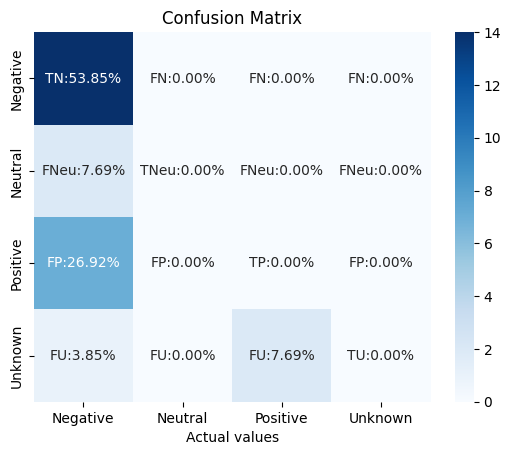

In [148]:
# Model building - SVC model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train,Y_train)
model_evaluate(SVCmodel)
y_pred_SVC = SVCmodel.predict(X_test)